### Imported the required Libraries and Classes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('titanic_toy.csv')

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

### Input and Target Features

In [6]:
X = df.drop(columns=['Survived'])
y = df['Survived']

### Train-Test Split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

### Adding Two Columns for each of Age and Fare with imputed values 99 and -1

In [8]:
print("Minimum Age Value:- ",X_train["Age"].min())
print("Maximum Age Value:- ",X_train["Age"].max())
print("Minimum Fare Value:- ",X_train["Fare"].min())
print("Maximum Fare Value:- ",X_train["Fare"].max())

Minimum Age Value:-  0.42
Maximum Age Value:-  71.0
Minimum Fare Value:-  0.0
Maximum Fare Value:-  512.3292


In [9]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

### While using this technique, it's definite that the Variance will change significantly.
#### But main purpose of using this technique is help Model differenciate between where values are known and where these are missing.

In [10]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1 imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  204.3495133904614
Age Variance after 99 imputation:  951.7275570187172
Age Variance after -1 imputation:  318.0896202624484
Original Fare variable variance:  2448.197913706318
Fare Variance after 999 imputation:  47219.20265217623
Fare Variance after -1 imputation:  2378.5676784883503


### Kernel Density Estimation plots

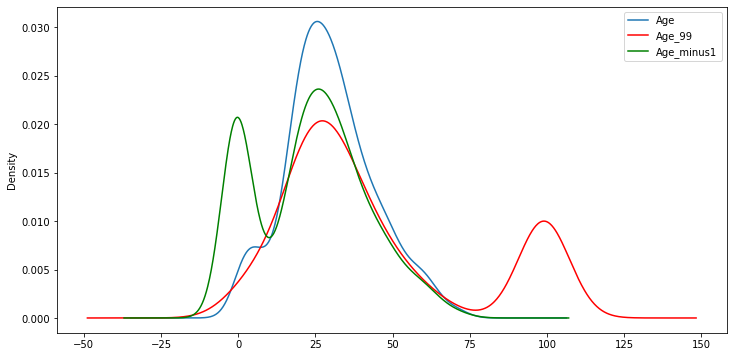

In [11]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


# For Age_99 and Age_minus1, the distribution is changed significantly with additional peaks at 99 and -1 respectively.
# This is so because around 20% of the total values are replaced with 99 and -1.

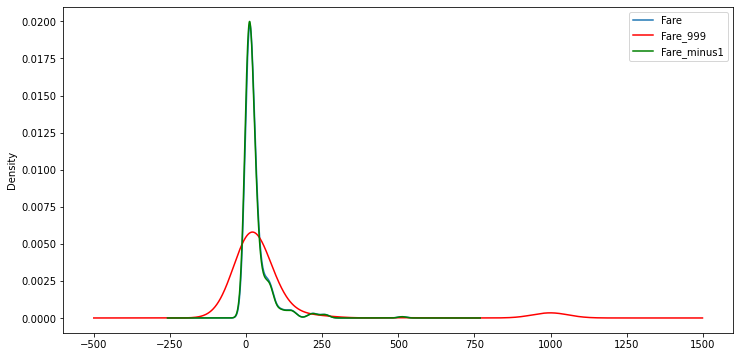

In [12]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [13]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,162.793430,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,11.528625,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.931663,-94.317400
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141
Fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678


In [14]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.051179,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.032079,0.205233
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.023857,-0.062687
Age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066411,0.131514
Fare_999,0.051179,1.000000,0.032079,-0.023857,0.066411,1.000000,0.071946
Fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.071946,1.000000


## Using Sklearn

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

### Defined two SimpleImputer objects/instances with same imputation startegy but different fill_value.

In [16]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

### Defined the Transformer to transform both the fileds with specified imputer object.

In [17]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [18]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [19]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [20]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [21]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [22]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])

In [23]:
transformed_df = pd.DataFrame(X_train, columns = df.columns[:3])

In [24]:
transformed_df.head()

,Age,Fare,Family
0,40.0,27.7208,0.0
1,4.0,16.7000,2.0
2,47.0,9.0000,0.0
3,9.0,31.3875,6.0
4,20.0,9.8458,0.0


In [25]:
transformed_df.isnull().mean()*100

Age       0.0
Fare      0.0
Family    0.0
dtype: float64